# Course 1: Machine Learning and Data Analysis
## week 3, tasks 1-3
The task is to get global minimum for functions:
$$f(x) = \sin\left(\frac{x}{5}\right)e^{x/10}+5e^{-x/2}$$
$$h(x) = int(f(x))$$

Use for both functions: 
- scipy.optimize.minimize function, method BFGS for 2 points: 2 and 30. Compare results and explain
- scipy.optimize.differential_evolution for [1, 30] 

## Solution
Prepare function

In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution

# function to approximate
def f(x):
    return math.sin(x/5.0) * math.exp(x/10.0) + 5.0 * math.exp(-x/2.0)

# not smooth function (and discontinious)
def h(x):
    return int(f(x))

Plot f(x) and h(x) for x=[1..30]

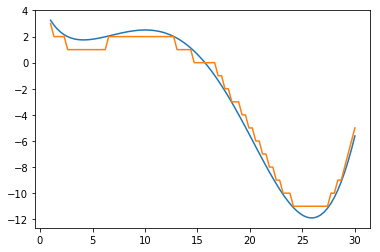

In [25]:
%matplotlib inline
# show function's graph on [1;30]
x_plt = np.linspace(1., 30., 90)
y_plt = [f(x) for x in x_plt]
h_plt = [h(x) for x in x_plt]
plt.plot(x_plt, y_plt)
plt.plot(x_plt, h_plt)
plt.show()

find f(x) minimum for x = 2:

In [13]:
minimize(f, [2], method='BFGS')

      fun: 1.745268290344928
 hess_inv: array([[ 5.98750711]])
      jac: array([ -2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627619])

got local minimum...

Ok, find f(x) minimum for x = 30:

In [27]:
minimize(f, [30], method='BFGS')

      fun: -11.898894665981322
 hess_inv: array([[ 1.67940841]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 25.880193])

Got better result.

Next find f(x) minimum for x = [1., 30.] using differential_evolution

In [29]:
differential_evolution(f, [(1., 30.)])

     fun: -11.898894665981317
     jac: array([  1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([ 25.88019317])

differential_evolution did not stuck in local minimum.

Next try the same optimization methods for not smooth and even discontinious function h(x)

In [31]:
minimize(h, [30], method='BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])

gradient descent with BFGS stuck immediately at the first plato

In [30]:
differential_evolution(h, [(1., 30.)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([ 26.49180725])

differential_evolution works much better in this case